In [264]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
p = 0.01

df = pd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > p,
    sep=';'
)

df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004653,2019,1503606,Itaituba,15,PA,16,F,1,2,...,B,A,A,C,A,A,E,A,B,B
1,190001004669,2019,1501402,Belém,15,PA,23,M,0,3,...,A,A,A,B,A,A,E,A,B,B
2,190001005173,2019,1501402,Belém,15,PA,18,F,1,3,...,B,A,A,B,A,A,E,A,A,A
3,190001005242,2019,1501402,Belém,15,PA,18,M,1,3,...,B,A,A,B,B,B,C,A,A,B
4,190001005322,2019,1501402,Belém,15,PA,17,F,1,3,...,A,A,A,B,A,A,C,A,A,A


In [266]:
df['NU_NOTA_GERAL'] = df[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].sum(axis=1)/5

In [267]:
deficiency = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA','IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF']
df['TP_PCD'] = df[deficiency].sum(axis=1).apply(lambda x: x>=1)

In [268]:
df['TP_COR_RACA'].replace({0: 'Não declarada',
                           1: 'Branca',
                           2: 'Preta',
                           3: 'Parda',
                           4: 'Amarela',
                           5: 'Indígena'}, inplace=True)

In [269]:
df['Q001'].replace({'A': 'Nunca estudou',
                    'B': 'Fund. incompleto',
                    'C': 'Fund. incompleto', 
                    'D': 'Medio incompleto',
                    'E': 'Medio completo',
                    'F': 'Superior completo',
                    'G': 'Pós graduação',
                    'H': 'Não sabe'}, inplace=True)

df['Q002'].replace({'A': 'Nunca estudou',
                    'B': 'Fund. incompleto',
                    'C': 'Fund. incompleto', 
                    'D': 'Medio incompleto',
                    'E': 'Medio completo',
                    'F': 'Superior completo',
                    'G': 'Pós graduação',
                    'H': 'Não sabe'}, inplace=True)

In [270]:
df = df[['SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_PCD', 'Q001', 'Q002', 'Q006',
         'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_GERAL']]

In [271]:
df.sort_values(by=['NU_NOTA_GERAL'], ascending=False, inplace=True)
df.head()

,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,TP_PCD,Q001,Q002,Q006,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_GERAL
29909,MG,M,Branca,False,Pós graduação,Pós graduação,O,723.5,790.0,705.8,964.8,980.0,832.82
18258,MG,M,Branca,False,Pós graduação,Pós graduação,Q,692.7,672.2,715.6,984.7,960.0,805.04
28341,GO,M,Branca,False,Pós graduação,Pós graduação,Q,653.0,755.3,756.1,886.2,960.0,802.12
8342,SP,M,Branca,False,Pós graduação,Pós graduação,M,664.0,725.8,755.3,902.3,960.0,801.48
35237,MG,M,Branca,False,Pós graduação,Superior completo,J,710.7,713.3,712.9,885.4,980.0,800.46


In [272]:
df.dropna(inplace=True)
df.shape

(37055, 13)

In [273]:
top = df[:int(0.01*df.shape[0])]
top.shape

(370, 13)

In [274]:
df['TP_RANKING'] = df.reset_index().drop(columns='index').index.to_numpy() < 1000
df['TP_RANKING'].replace({True: 'Top 1%',
                          False: 'Todos os candidatos'}, inplace=True)
df = df.sort_values(by='TP_RANKING')
df.head()

,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,TP_PCD,Q001,Q002,Q006,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_GERAL,TP_RANKING
1111,PI,F,Parda,False,Fund. incompleto,Fund. incompleto,B,486.8,478.1,467.0,482.3,660.0,514.84,Todos os candidatos
7112,RS,F,Parda,False,Fund. incompleto,Fund. incompleto,B,495.2,503.8,454.2,476.5,480.0,481.94,Todos os candidatos
13437,SP,M,Parda,False,Fund. incompleto,Fund. incompleto,A,480.2,501.3,433.3,414.9,580.0,481.94,Todos os candidatos
12557,SE,F,Branca,False,Fund. incompleto,Fund. incompleto,B,494.6,470.6,396.0,488.5,560.0,481.94,Todos os candidatos
2170,MA,M,Preta,False,Medio completo,Fund. incompleto,B,545.7,481.6,473.2,429.1,480.0,481.92,Todos os candidatos


In [275]:
sns.set_style('whitegrid')

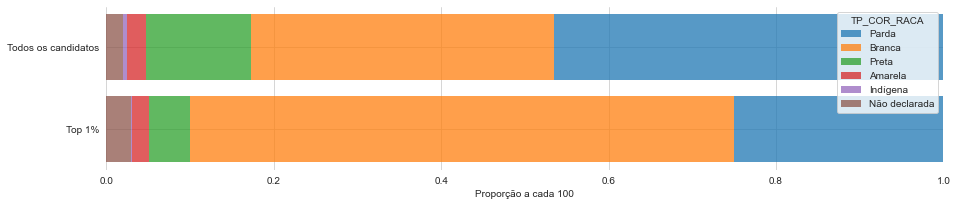

In [276]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.histplot(df, y="TP_RANKING", hue="TP_COR_RACA", stat="probability", multiple="fill", shrink=0.8, ax=ax, edgecolor="none")
sns.despine(left=True, bottom=True)
plt.margins(x=0.7)
ax.set_ylabel('')
ax.set_xlabel('Proporção a cada 100')
plt.show()

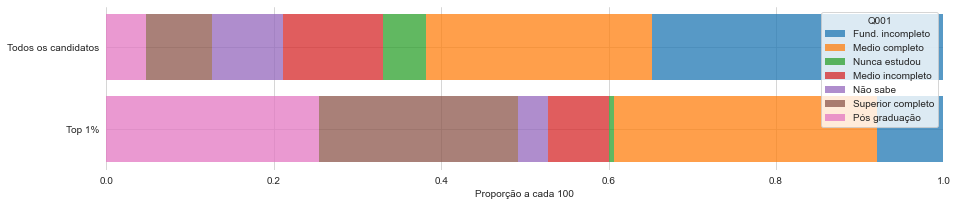

In [277]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.histplot(df, y="TP_RANKING", hue="Q001", stat="probability", multiple="fill", shrink=0.8, ax=ax, edgecolor="none")
sns.despine(left=True, bottom=True)
plt.margins(x=0.7)
ax.set_ylabel('')
ax.set_xlabel('Proporção a cada 100')
plt.show()

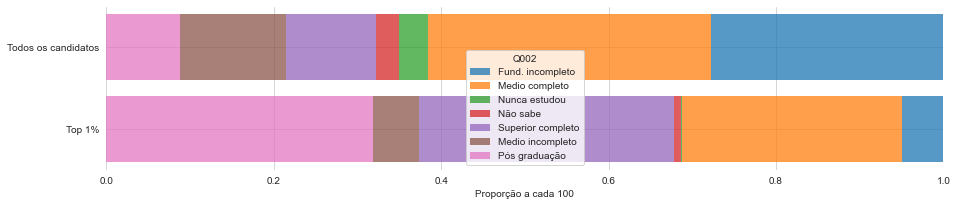

In [278]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.histplot(df, y="TP_RANKING", hue="Q002", stat="probability", multiple="fill", shrink=0.8, ax=ax, edgecolor="none")
sns.despine(left=True, bottom=True)
plt.margins(x=0.7)
ax.set_ylabel('')
ax.set_xlabel('Proporção a cada 100')
plt.show()

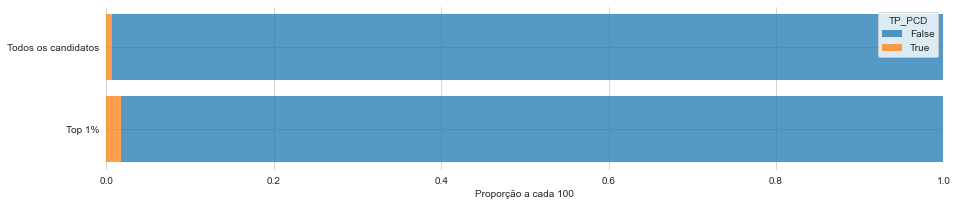

In [279]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.histplot(df, y="TP_RANKING", hue="TP_PCD", stat="probability", multiple="fill", shrink=0.8, ax=ax, edgecolor="none")
sns.despine(left=True, bottom=True)
plt.margins(x=0.7)
ax.set_ylabel('')
ax.set_xlabel('Proporção a cada 100')
plt.show()

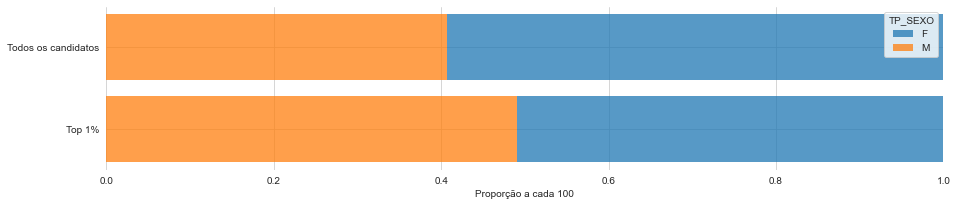

In [280]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.histplot(df, y="TP_RANKING", hue="TP_SEXO", stat="probability", multiple="fill", shrink=0.8, ax=ax, edgecolor="none")
sns.despine(left=True, bottom=True)
plt.margins(x=0.7)
ax.set_ylabel('')
ax.set_xlabel('Proporção a cada 100')
plt.show()